<a href="https://colab.research.google.com/github/shumail1460/Digital-Signal-Processing/blob/main/DSP_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import librosa
import librosa.display
from IPython.display import Audio
from scipy.io import wavfile

In [ ]:
def dft(x):

    x = np.asarray(x, dtype=complex)  # Ensure input is a complex array
    N = x.shape[0]  # Length of the signal
    n = np.arange(N)
    k = n.reshape((N, 1))

    # Create the twiddle factor matrix
    W = np.exp(-2j * np.pi * k * n / N)

    # Compute the DFT using matrix multiplication
    X = np.dot(W, x)

    return X

In [ ]:
def idft(X):

    X = np.asarray(X, dtype=complex)  # Ensure input is a complex array
    N = X.shape[0]  # Length of the signal
    n = np.arange(N)
    k = n.reshape((N, 1))

    # Create the twiddle factor matrix (complex conjugate for IDFT)
    W = np.exp(2j * np.pi * k * n / N)

    # Compute the IDFT using matrix multiplication
    x = np.dot(W, X) / N

    return x


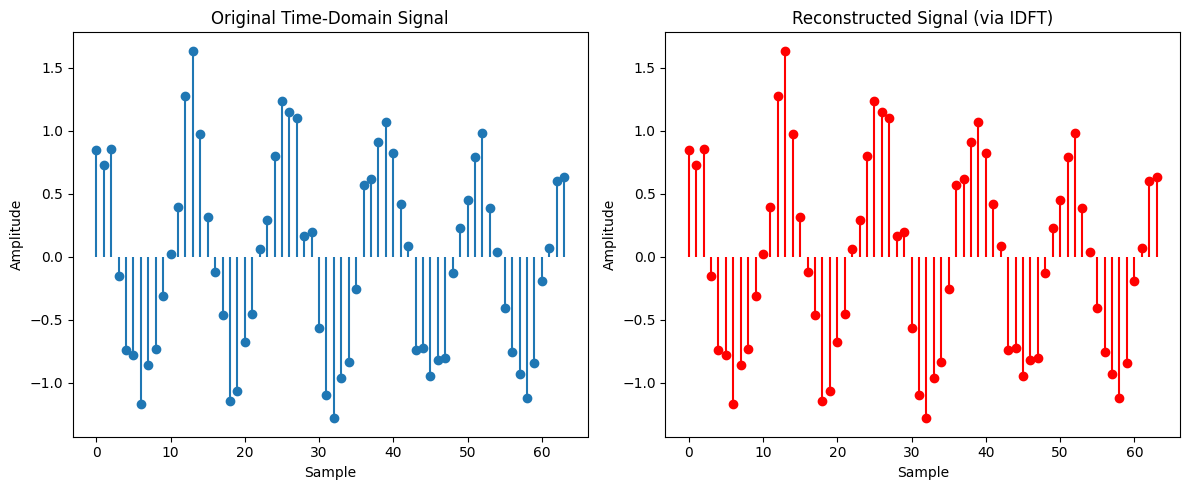

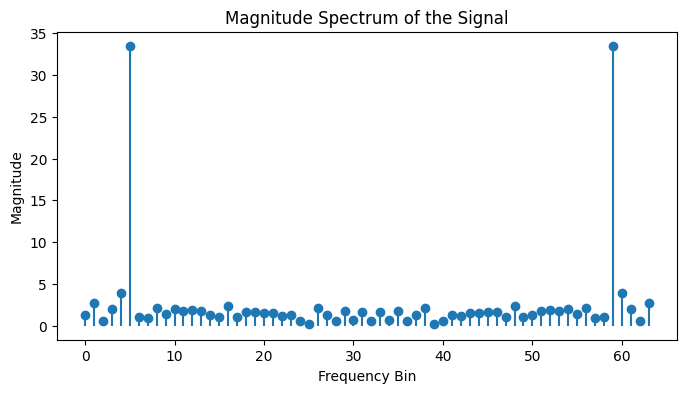

In [ ]:
# Generate a sample time-domain signal: a cosine wave with added noise
N = 64  # Number of samples
t = np.arange(N)
freq = 5  # Frequency in Hz (sample rate assumed as 1 for simplicity)
x = np.cos(2 * np.pi * freq * t / N) + 0.2 * np.random.randn(N)

# Compute the DFT
X = dft(x)

# Compute the IDFT to reconstruct the time-domain signal
x_rec = idft(X)

# Plot original and reconstructed signals
plt.figure(figsize=(12, 5))

# Original signal
plt.subplot(1, 2, 1)
plt.stem(t, x, basefmt=" ")
plt.title('Original Time-Domain Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Reconstructed signal
plt.subplot(1, 2, 2)
plt.stem(t, x_rec.real, linefmt='r-', markerfmt='ro', basefmt=" ")
plt.title('Reconstructed Signal (via IDFT)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Plot the magnitude spectrum of X
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), np.abs(X), basefmt=" ")
plt.title('Magnitude Spectrum of the Signal')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.show()


# **3.4 Experiment Tasks**

**1. Varying Signal Length and Frequency:**

o Change the signal length NNN and the frequency components.

o Observe how the DFT spectrum changes.

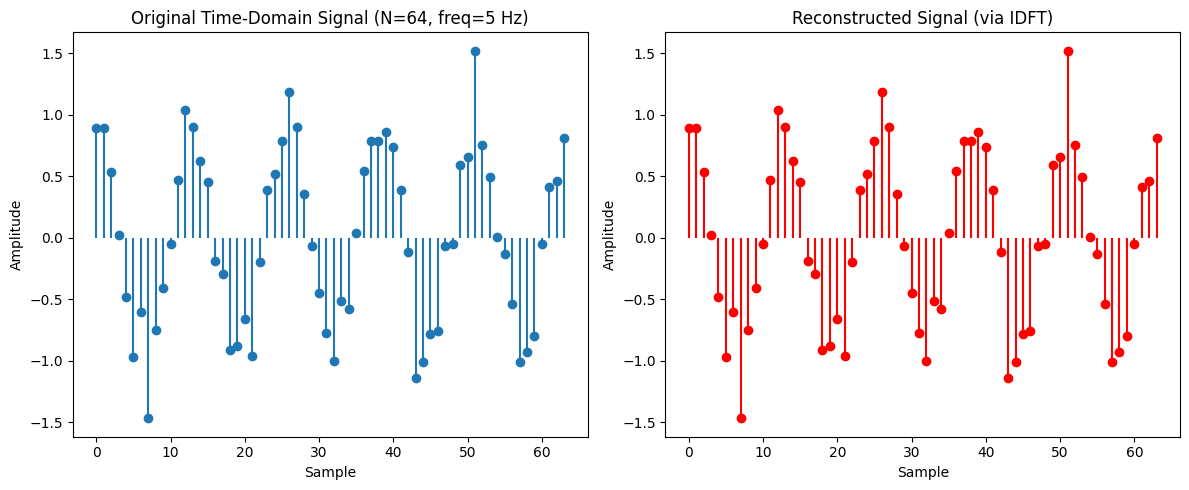

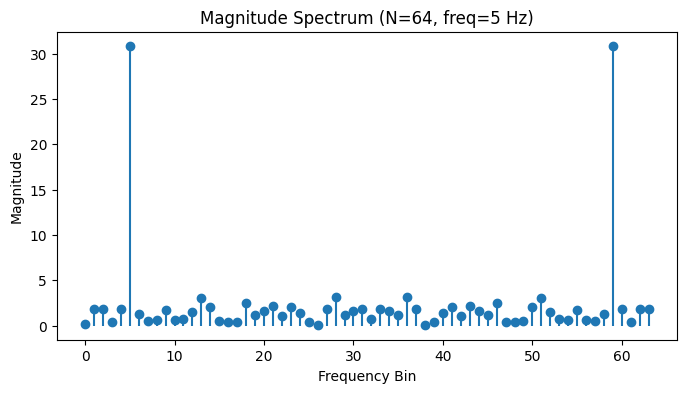

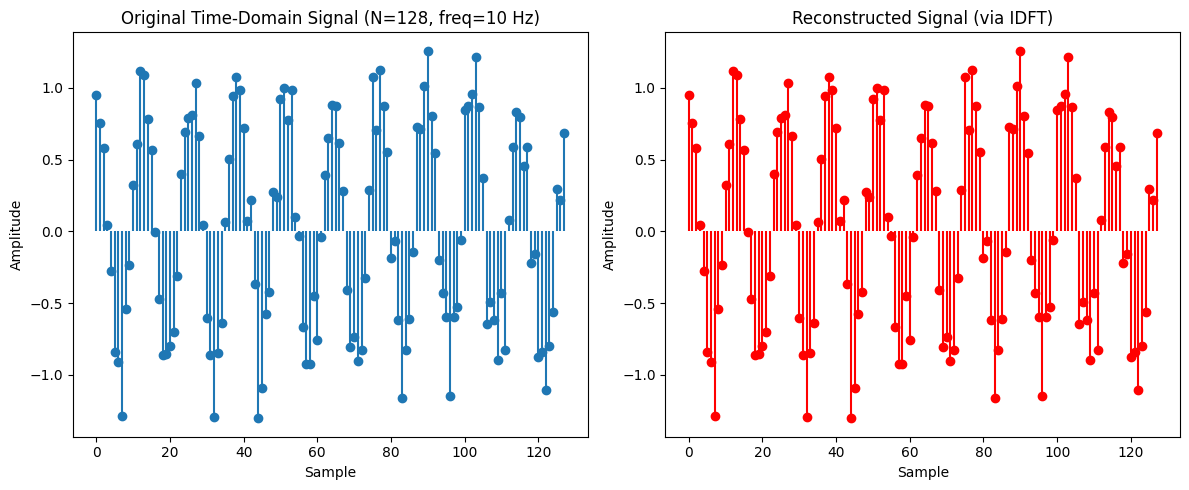

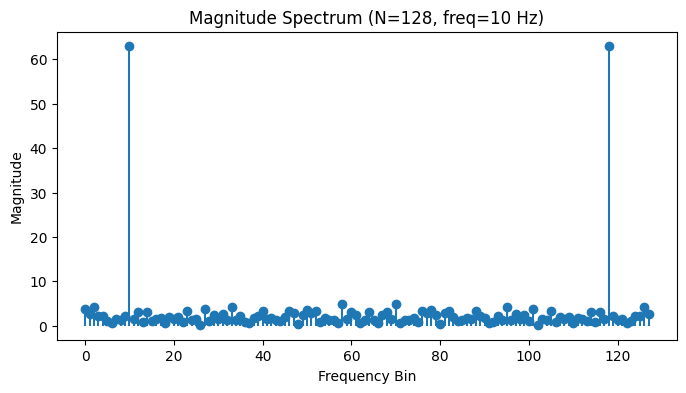

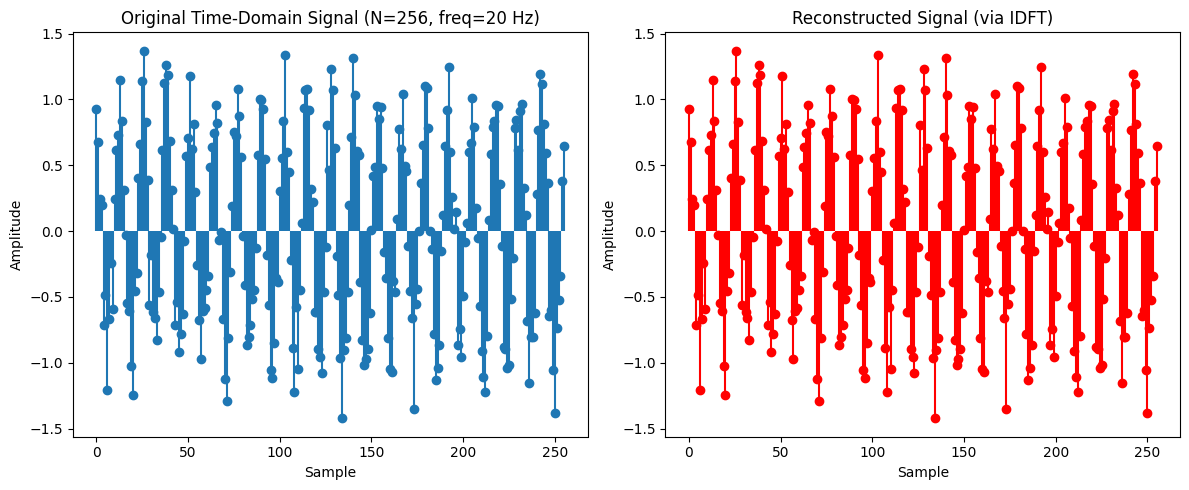

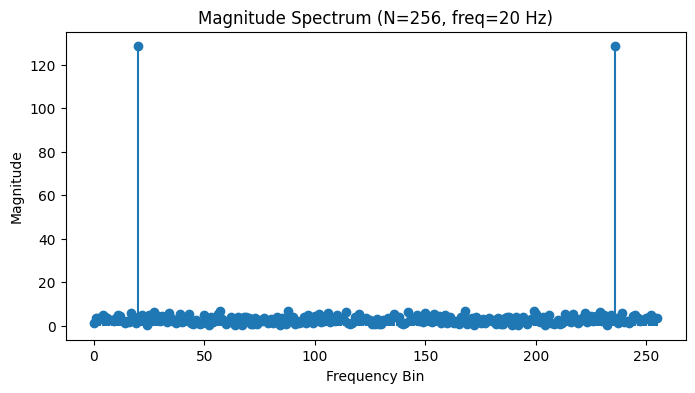

In [ ]:
def analyze_dft(N, freq):

    t = np.arange(N)
    x = np.cos(2 * np.pi * freq * t / N) + 0.2 * np.random.randn(N)

    # Compute the DFT
    X = dft(x)

    # Compute the IDFT to reconstruct the time-domain signal
    x_rec = idft(X)

    # Plot original and reconstructed signals
    plt.figure(figsize=(12, 5))

    # Original signal
    plt.subplot(1, 2, 1)
    plt.stem(t, x, basefmt=" ")
    plt.title(f'Original Time-Domain Signal (N={N}, freq={freq} Hz)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Reconstructed signal
    plt.subplot(1, 2, 2)
    plt.stem(t, x_rec.real, linefmt='r-', markerfmt='ro', basefmt=" ")
    plt.title('Reconstructed Signal (via IDFT)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

    # Plot the magnitude spectrum of X
    plt.figure(figsize=(8, 4))
    plt.stem(np.arange(N), np.abs(X), basefmt=" ")
    plt.title(f'Magnitude Spectrum (N={N}, freq={freq} Hz)')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.show()

# Test different signal lengths and frequencies
for N, freq in [(64, 5), (128, 10), (256, 20)]:
    analyze_dft(N, freq)


**2. Noise Analysis:**

o Add different levels of noise to the signal.

o Compare the clean and noisy spectra, and discuss how noise affects the Fourier coefficients.

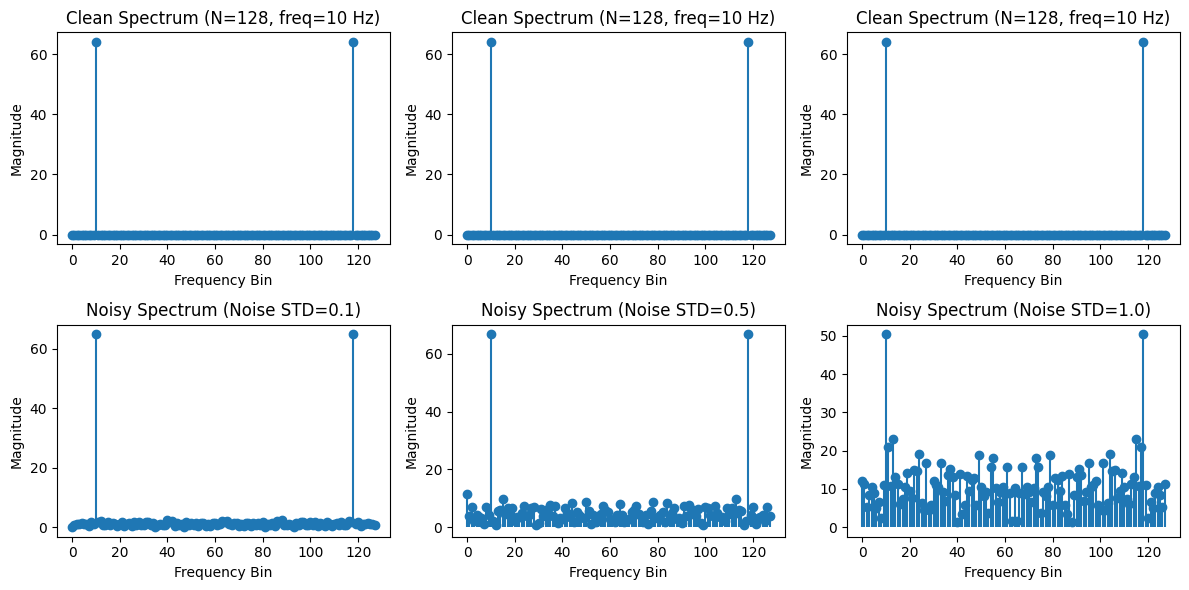

In [ ]:
def analyze_noise_effect(N, freq, noise_levels):

    t = np.arange(N)
    clean_signal = np.cos(2 * np.pi * freq * t / N)

    plt.figure(figsize=(12, 6))

    for i, noise_std in enumerate(noise_levels):
        # Add Gaussian noise with standard deviation noise_std
        noisy_signal = clean_signal + noise_std * np.random.randn(N)

        # Compute the DFT
        X_clean = dft(clean_signal)
        X_noisy = dft(noisy_signal)

        # Plot the magnitude spectra
        plt.subplot(2, len(noise_levels), i + 1)
        plt.stem(np.abs(X_clean), basefmt=" ")
        plt.title(f'Clean Spectrum (N={N}, freq={freq} Hz)')
        plt.xlabel('Frequency Bin')
        plt.ylabel('Magnitude')

        plt.subplot(2, len(noise_levels), i + 1 + len(noise_levels))
        plt.stem(np.abs(X_noisy), basefmt=" ")
        plt.title(f'Noisy Spectrum (Noise STD={noise_std})')
        plt.xlabel('Frequency Bin')
        plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

# Define different noise levels to test
noise_levels = [0.1, 0.5, 1.0]  # Low, Medium, and High noise levels

# Run the analysis for N=128, freq=10 Hz
analyze_noise_effect(N=128, freq=10, noise_levels=noise_levels)


**3. Comparison with FFT:**

o Use NumPy’s np.fft.fft and np.fft.ifft functions to compute the DFT/IDFT.

o Compare the results and discuss the computational differences

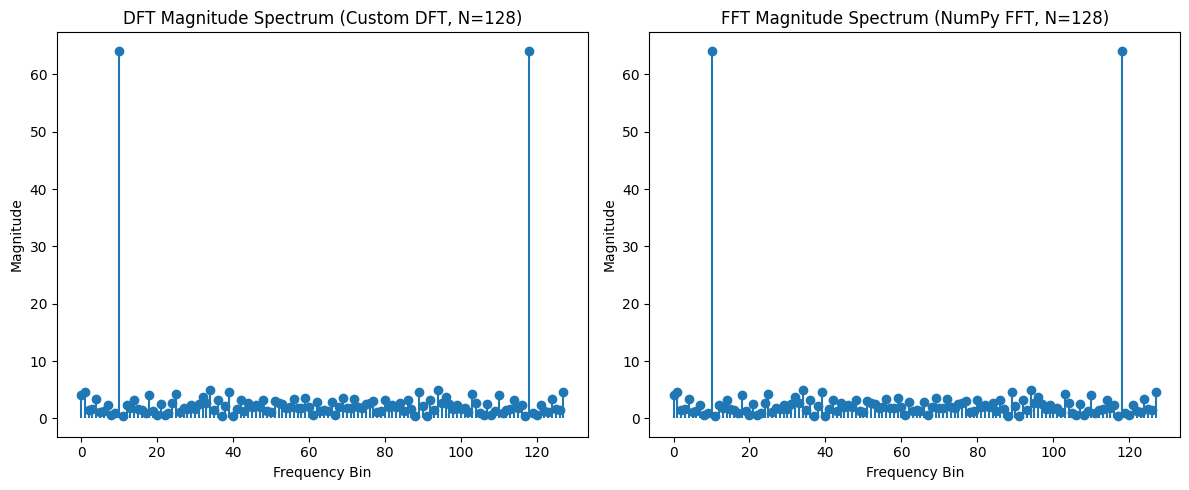

Custom DFT Time: 0.001650 sec
Custom IDFT Time: 0.001752 sec
NumPy FFT Time: 0.000063 sec
NumPy IFFT Time: 0.000013 sec


In [ ]:
def compare_dft_fft(N, freq):

    t = np.arange(N)
    x = np.cos(2 * np.pi * freq * t / N) + 0.2 * np.random.randn(N)

    # Compute DFT using custom implementation
    start_time = time.time()
    X_dft = dft(x)
    dft_time = time.time() - start_time

    # Compute IDFT using custom implementation
    start_time = time.time()
    x_rec_dft = idft(X_dft)
    idft_time = time.time() - start_time

    # Compute FFT using NumPy
    start_time = time.time()
    X_fft = np.fft.fft(x)
    fft_time = time.time() - start_time

    # Compute IFFT using NumPy
    start_time = time.time()
    x_rec_fft = np.fft.ifft(X_fft)
    ifft_time = time.time() - start_time

    # Plot the magnitude spectra comparison
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.stem(np.abs(X_dft), basefmt=" ")
    plt.title(f'DFT Magnitude Spectrum (Custom DFT, N={N})')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')

    plt.subplot(1, 2, 2)
    plt.stem(np.abs(X_fft), basefmt=" ")
    plt.title(f'FFT Magnitude Spectrum (NumPy FFT, N={N})')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')

    plt.tight_layout()
    plt.show()

    # Print computation times
    print(f"Custom DFT Time: {dft_time:.6f} sec")
    print(f"Custom IDFT Time: {idft_time:.6f} sec")
    print(f"NumPy FFT Time: {fft_time:.6f} sec")
    print(f"NumPy IFFT Time: {ifft_time:.6f} sec")

# Run the comparison for N=128, freq=10 Hz
compare_dft_fft(N=128, freq=10)


**4. Twiddle Factor Analysis:**

o Print out the twiddle factor matrix for small values of NNN (e.g., N=4 or 888) to study its symmetry and periodicity.

Twiddle Factor Matrix for N=4:

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


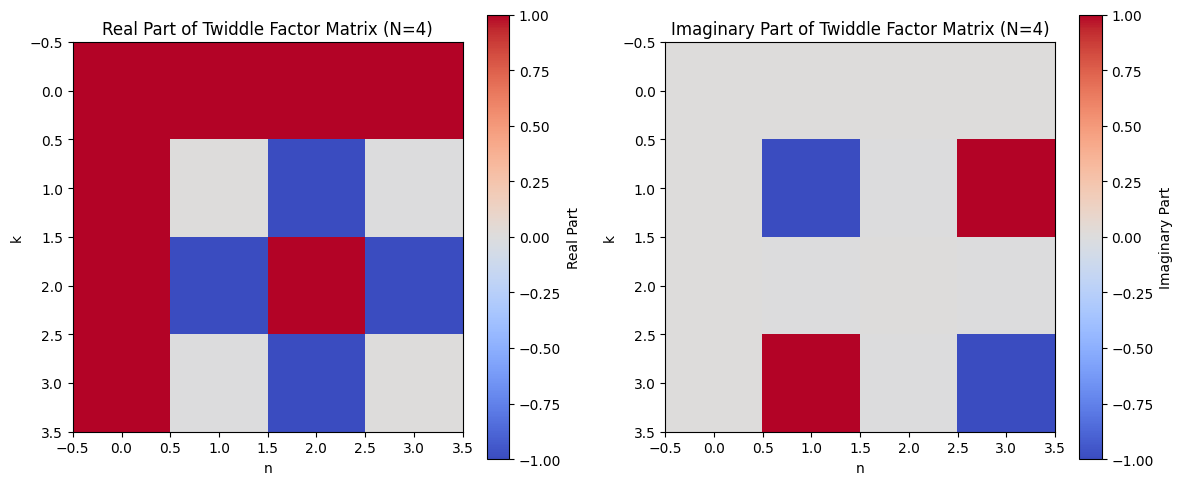

Twiddle Factor Matrix for N=8:

[[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j
   1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.707-0.707j  0.   -1.j    -0.707-0.707j -1.   -0.j
  -0.707+0.707j -0.   +1.j     0.707+0.707j]
 [ 1.   +0.j     0.   -1.j    -1.   -0.j    -0.   +1.j     1.   +0.j
   0.   -1.j    -1.   -0.j    -0.   +1.j   ]
 [ 1.   +0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
   0.707+0.707j  0.   -1.j    -0.707+0.707j]
 [ 1.   +0.j    -1.   -0.j     1.   +0.j    -1.   -0.j     1.   +0.j
  -1.   -0.j     1.   +0.j    -1.   -0.j   ]
 [ 1.   +0.j    -0.707+0.707j  0.   -1.j     0.707+0.707j -1.   -0.j
   0.707-0.707j -0.   +1.j    -0.707-0.707j]
 [ 1.   +0.j    -0.   +1.j    -1.   -0.j     0.   -1.j     1.   +0.j
  -0.   +1.j    -1.   -0.j    -0.   -1.j   ]
 [ 1.   +0.j     0.707+0.707j -0.   +1.j    -0.707+0.707j -1.   -0.j
  -0.707-0.707j -0.   -1.j     0.707-0.707j]]


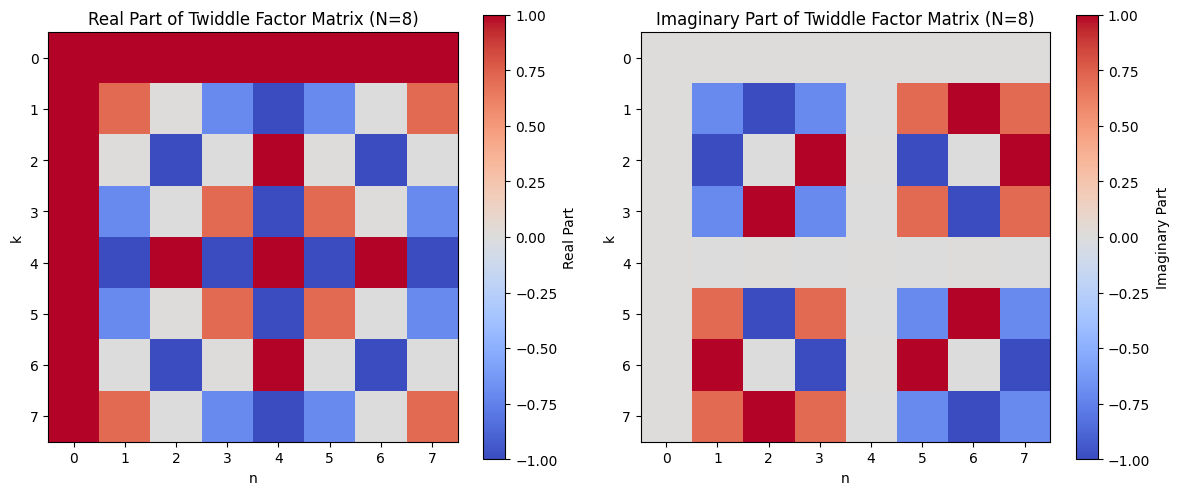

In [ ]:
def analyze_twiddle_factors(N):

    n = np.arange(N)
    k = n.reshape((N, 1))

    # Compute the Twiddle Factor Matrix
    W = np.exp(-2j * np.pi * k * n / N)

    # Print the Twiddle Factor Matrix (rounded for better readability)
    print(f"Twiddle Factor Matrix for N={N}:\n")
    print(np.round(W, 3))  # Rounding for better visualization

    # Plot the Twiddle Factor Matrix
    plt.figure(figsize=(12, 5))

    # Plot Real Part
    plt.subplot(1, 2, 1)
    plt.imshow(W.real, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Real Part')
    plt.title(f'Real Part of Twiddle Factor Matrix (N={N})')
    plt.xlabel('n')
    plt.ylabel('k')

    # Plot Imaginary Part
    plt.subplot(1, 2, 2)
    plt.imshow(W.imag, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Imaginary Part')
    plt.title(f'Imaginary Part of Twiddle Factor Matrix (N={N})')
    plt.xlabel('n')
    plt.ylabel('k')

    plt.tight_layout()
    plt.show()

# Analyze Twiddle Factors for N=4 and N=8
analyze_twiddle_factors(N=4)
analyze_twiddle_factors(N=8)


**5. Windowing Effects:**

o Apply a window function (like Hamming or Hanning) to the time-domain signal before computing the DFT.

o Observe and explain the changes in the frequency domain.

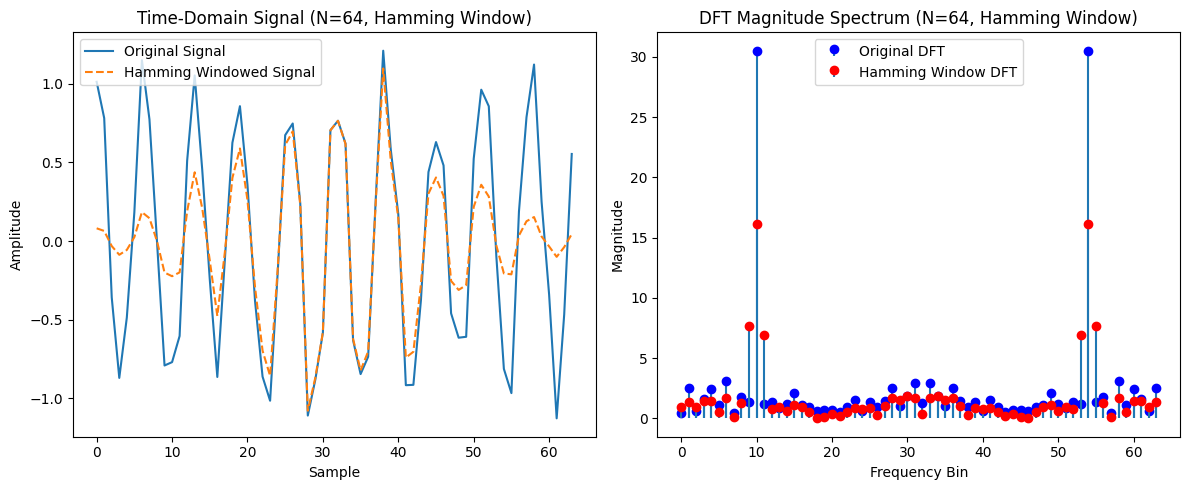

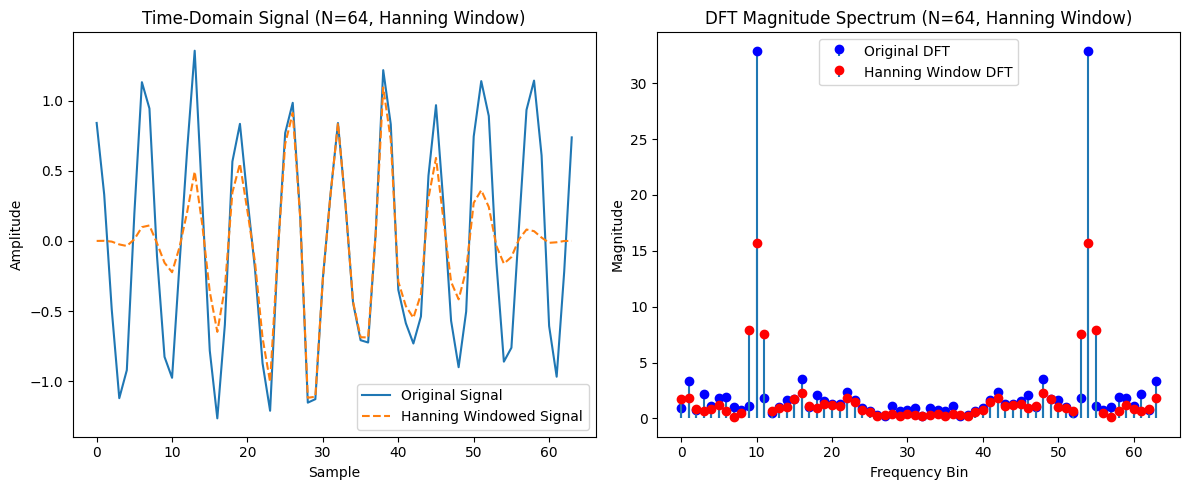

In [ ]:
def apply_windowing(N, freq, window_type="hamming"):

    t = np.arange(N)
    x = np.cos(2 * np.pi * freq * t / N) + 0.2 * np.random.randn(N)  # Cosine wave with noise

    # Apply the chosen window function
    if window_type == "hamming":
        window = np.hamming(N)
    elif window_type == "hanning":
        window = np.hanning(N)
    else:
        raise ValueError("Invalid window type. Choose 'hamming' or 'hanning'.")

    x_windowed = x * window  # Apply window

    # Compute DFT for original and windowed signals
    X_original = dft(x)
    X_windowed = dft(x_windowed)

    # Plot the time-domain signals
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t, x, label="Original Signal")
    plt.plot(t, x_windowed, label=f"{window_type.capitalize()} Windowed Signal", linestyle="dashed")
    plt.legend()
    plt.title(f"Time-Domain Signal (N={N}, {window_type.capitalize()} Window)")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")

    # Plot the magnitude spectrum
    plt.subplot(1, 2, 2)
    plt.stem(np.abs(X_original), basefmt=" ", markerfmt="bo", label="Original DFT")
    plt.stem(np.abs(X_windowed), basefmt=" ", markerfmt="ro", label=f"{window_type.capitalize()} Window DFT")
    plt.legend()
    plt.title(f"DFT Magnitude Spectrum (N={N}, {window_type.capitalize()} Window)")
    plt.xlabel("Frequency Bin")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

# Run for N=64, freq=10 Hz with Hamming and Hanning windows
apply_windowing(N=64, freq=10, window_type="hamming")
apply_windowing(N=64, freq=10, window_type="hanning")


# **Fourier analysis of audio signal :**

In [ ]:
def classify_voice(freqs, magnitude):
    dominant_freq = freqs[np.argmax(magnitude)]  # Find peak frequency

    if 85 <= dominant_freq <= 180:
        age = int(np.interp(dominant_freq, [85, 180], [18, 60]))  # Map frequency to age
        return "Male", f"Approx. {age} years"
    elif 165 <= dominant_freq <= 255:
        age = int(np.interp(dominant_freq, [165, 255], [18, 60]))  # Map frequency to age
        return "Female", f"Approx. {age} years"
    elif dominant_freq >= 250:
        age = int(np.interp(dominant_freq, [250, 350], [5, 15]))  # Map frequency to age
        return "Child", f"Approx. {age} years"
    else:
        return "Unknown", "Age undetermined"

def analyze_audio(file_path):
    fs, data = wavfile.read(file_path)
    if data.ndim > 1:
        data = data.mean(axis=1)  # Convert to mono
    data = data / np.max(np.abs(data))  # Normalize

    N = len(data)
    fft_data = np.fft.fft(data)[:N // 2]  # Compute FFT
    freqs = np.fft.fftfreq(N, d=1/fs)[:N // 2]  # Frequency bins
    magnitude = np.abs(fft_data)  # Magnitude spectrum

    gender, age = classify_voice(freqs, magnitude)

    plt.figure(figsize=(12, 6))
    plt.plot(freqs, magnitude, color='blue', lw=1)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title(f"Frequency Spectrum ({gender}, {age})")
    plt.grid(True)
    plt.show()

    print(f"Detected: {gender}, Age: {age}")

# File selection based on user input
audio_files = {"1": "/content/CHILD.wav", "2": "/content/FEMALE.wav", "3": "/content/MAN.wav"}
choice = input("Press 1, 2, or 3 to select an audio file: ")
if choice in audio_files:
    analyze_audio(audio_files[choice])
else:
    print("Invalid choice. Please restart and select 1, 2, or 3.")


Press 1, 2, or 3 to select an audio file: 1


FileNotFoundError: [Errno 2] No such file or directory: '/content/CHILD.wav'

Press 1, 2, or 3 to select an audio file: 1


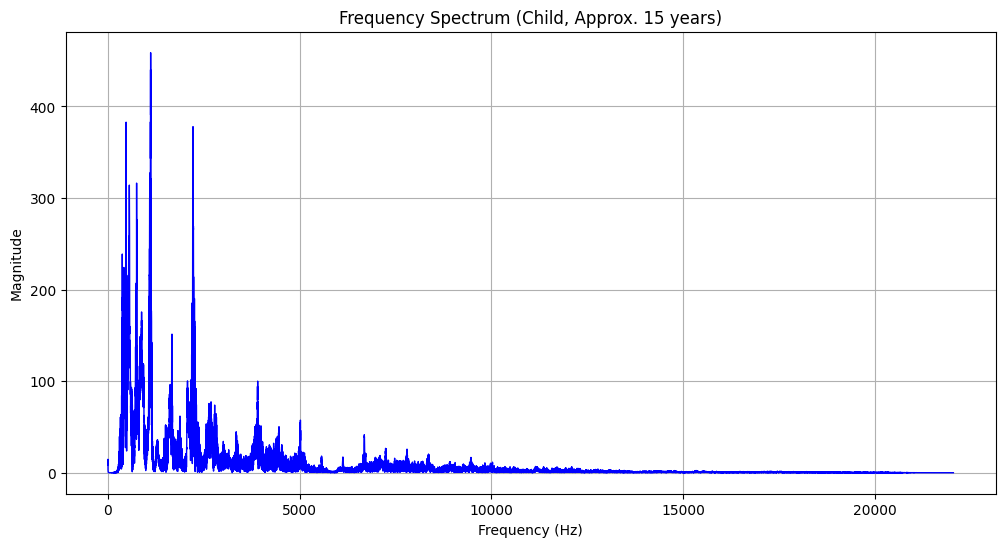

Detected: Child, Age: Approx. 15 years


In [ ]:
def classify_voice(freqs, magnitude):
    dominant_freq = freqs[np.argmax(magnitude)]  # Find peak frequency

    if 85 <= dominant_freq <= 180:
        age = int(np.interp(dominant_freq, [85, 250], [20, 60]))  # Adjusted age mapping
        return "Male", f"Approx. {age} years"
    elif 165 <= dominant_freq <= 255:
        age = int(np.interp(dominant_freq, [250, 300], [18, 50]))  # Adjusted age mapping
        return "Female", f"Approx. {age} years"
    elif dominant_freq >= 250:
        age = int(np.interp(dominant_freq, [300, 350], [5, 15]))  # Adjusted age mapping
        return "Child", f"Approx. {age} years"
    else:
        return "Unknown", "Age undetermined"

def analyze_audio(file_path):
    fs, data = wavfile.read(file_path)
    if data.ndim > 1:
        data = data.mean(axis=1)  # Convert to mono
    data = data / np.max(np.abs(data))  # Normalize

    N = len(data)
    fft_data = np.fft.fft(data)[:N // 2]  # Compute FFT
    freqs = np.fft.fftfreq(N, d=1/fs)[:N // 2]  # Frequency bins
    magnitude = np.abs(fft_data)  # Magnitude spectrum

    gender, age = classify_voice(freqs, magnitude)

    plt.figure(figsize=(12, 6))
    plt.plot(freqs, magnitude, color='blue', lw=1)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title(f"Frequency Spectrum ({gender}, {age})")
    plt.grid(True)
    plt.show()

    print(f"Detected: {gender}, Age: {age}")

# File selection based on user input
audio_files = {"1": "/content/CHILD.wav", "2": "/content/Female.wav", "3": "/content/MAN.wav"}
choice = input("Press 1, 2, or 3 to select an audio file: ")
if choice in audio_files:
    analyze_audio(audio_files[choice])
else:
    print("Invalid choice. Please restart and select 1, 2, or 3.")